In [1]:
require(data.table)
require(ggplot2)
setwd("/local/home/sarahgw/WGS/SNPS/Myso/sfs")

Loading required package: data.table
Loading required package: ggplot2


In [2]:
Myso=read.table("Pre_Post_Myso_unfilt.fst.sw", header=TRUE, row.names=NULL)

In [3]:
head(Myso)

row.names,region,chr,midPos,Nsites
"(0,62)(16179,16242)(16179,26179)",AAPE02055386,21179,64,0.027687
"(63,444)(44356,44883)(36179,46179)",AAPE02055386,41179,383,0.042515
"(63,444)(44356,44883)(38179,48179)",AAPE02055386,43179,383,0.042515
"(63,444)(44356,44883)(40179,50179)",AAPE02055386,45179,383,0.042515
"(63,444)(44356,44883)(42179,52179)",AAPE02055386,47179,383,0.042515
"(63,444)(44356,44883)(44179,54179)",AAPE02055386,49179,383,0.042515


In [3]:
Myso$row.names=NULL

In [4]:
colnames(Myso)=c("Scaffold", "midPos", "nSites", "FST")

In [11]:
head(Myso)

Scaffold,midPos,nSites,FST
AAPE02055386,21179,64,0.027687
AAPE02055386,41179,383,0.042515
AAPE02055386,43179,383,0.042515
AAPE02055386,45179,383,0.042515
AAPE02055386,47179,383,0.042515
AAPE02055386,49179,383,0.042515


In [5]:
Mysofull=Myso[Myso$nSites>=7999,]

In [21]:
head(Mysofull)

,Scaffold,midPos,nSites,FST
216,AAPE02057026,33293,8122,0.028342
221,AAPE02057026,43293,8047,0.025585
222,AAPE02057026,45293,8365,0.025786
223,AAPE02057026,47293,8061,0.026256
288,AAPE02057108,47422,8114,0.030826
301,AAPE02057108,73422,8495,0.028575


In [22]:
plotMyso=ggplot(data=Mysofull, aes(x=Scaffold, y=FST))+
  geom_point(data=Mysofull)+ theme_bw()+theme(axis.text.x=element_blank(), panel.grid.minor = element_blank(), panel.grid.major = element_blank())+ ggtitle("Myso_FST")+theme(plot.title = element_text(hjust = 0.5))

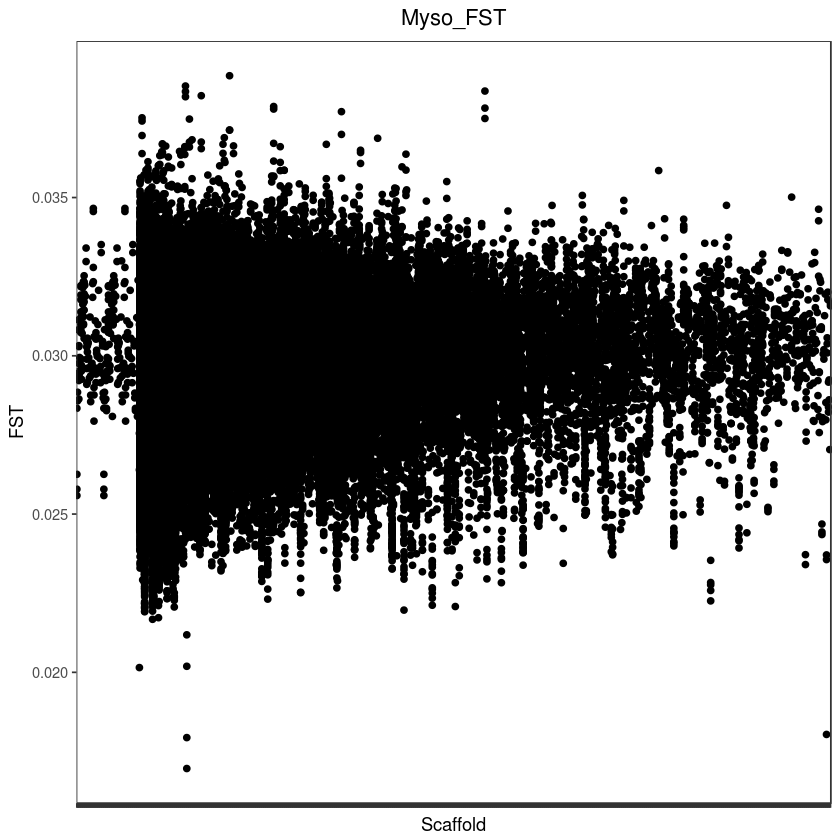

In [23]:
plotMyso

To do:
Where are these outliers and are they outliers in mylu too?

In [27]:
Mysofull[Mysofull$FST>0.037,]

,Scaffold,midPos,nSites,FST
86856,GL429770,14837002,8032,0.037417
86857,GL429770,14839002,8034,0.037519
427843,GL429836,1117542,8721,0.038184
427844,GL429836,1119542,8609,0.038348
427845,GL429836,1121542,8571,0.038523
444756,GL429842,4199782,8069,0.037479
486971,GL429860,3015001,8641,0.038217
570854,GL429903,1097394,8511,0.037132
570855,GL429903,1099394,8641,0.037131
570856,GL429903,1101394,8591,0.038848


## PCA and Admixture

In [6]:
samples=read.table("/local/home/sarahgw/WGS/Sequences/filelists/All_Myso.filelist", header=FALSE)

In [7]:
samples1=gsub("_pairedplus_marked_dupes.bam", " ", samples$V1)

In [8]:
pops=rep(c("Myso_Post","Myso_Pre" ), times=c(16, 16))
popcols=rep(c("darkgreen","darkred"), times=c(16, 16))
time=rep(c(0,2), times=c(16, 16))

In [9]:
head(popcols)

[1] "darkgreen" "darkgreen" "darkgreen" "darkgreen" "darkgreen" "darkgreen"

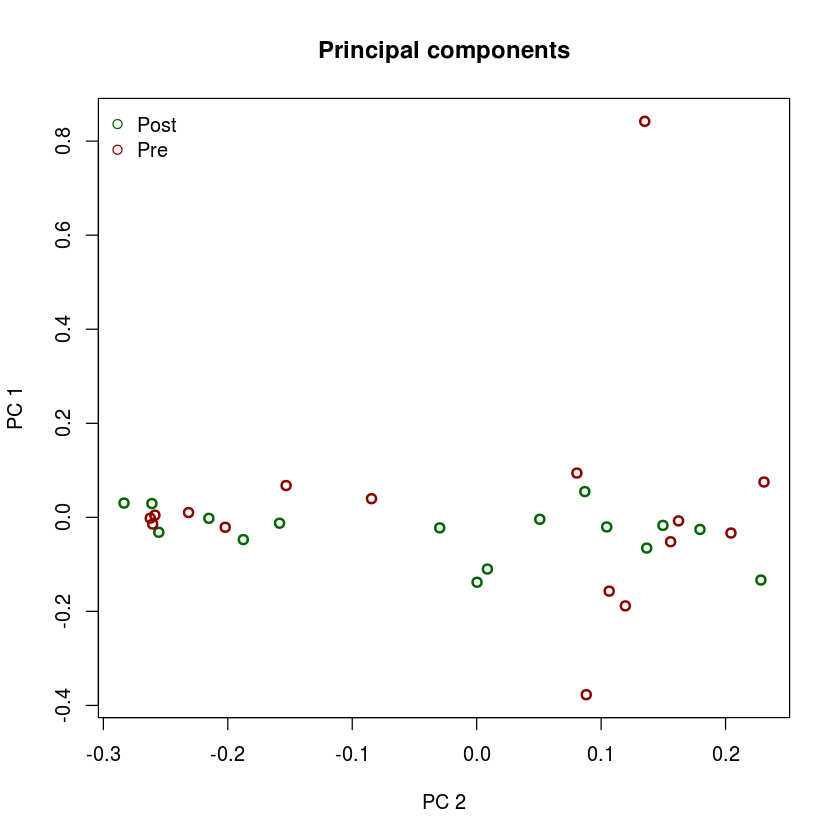

In [24]:
cov =as.matrix(read.table("/local/home/sarahgw/WGS/SNPS/Myso/genolike/All_myso_gl_filt.cov"))
e = eigen(cov)
#pdf("/local/home/sarahgw/WGS/SNPS/All_mylu/plots/PCA_plot_noout.pdf", width = 6, height = 6)
plot(e$vectors[,1:2],lwd=2,ylab="PC 1",xlab="PC 2",main="Principal components",col=popcols, pch=1)
legend(x="topleft", bty="n",pch=1, legend=c("Post","Pre"), col=c("darkgreen","darkred"))

#dev.off()

In [31]:
pops1=as.data.frame(pops)

In [32]:
class(pops1)

[1] "data.frame"

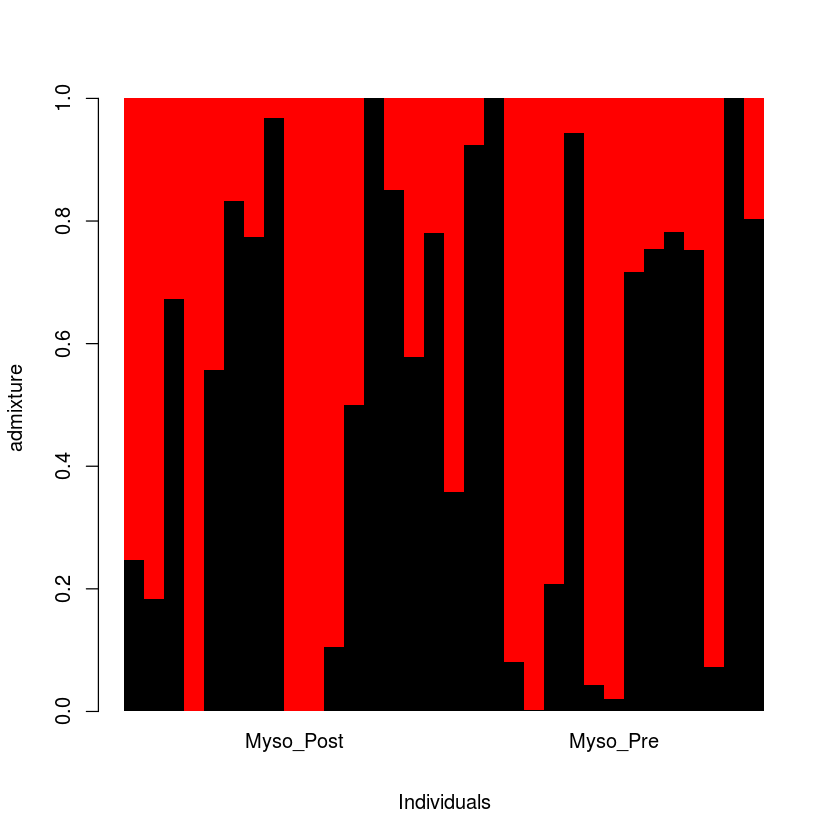

In [33]:
admix = t(as.matrix(read.table("/local/home/sarahgw/WGS/SNPS/Myso/genolike/All_myso_gl_filt.K2.a1.0.qopt")))
admix = admix[,order(pops[,1])]
pops = pops[order(pops[,1]),]
h = barplot(admix,col=1:4,space=0,border=NA,xlab="Individuals",ylab="admixture")
text(tapply(1:nrow(pops1),pops1[,1],mean),-0.05,unique(pops1[,1]),xpd=T)